<center> <h1>Predicción del precio del Bitcoin</h1> 
<img src="https://www.unicaribe.mx/static/img/logo.png">
<h1> Rafael Lagunas Guitron</h1>
<h2>150300810</h2>
<h1> Ingeniería en Datos e Inteligencia Organizacional</h1>
<h1> </h1>
</center>

### Introduccion:

En esta era moderna, es importante tener conocimiento de las criptomonedas, en  especial la $BITCOIN$, al ser la principal del mercado, hay que tomarse el tiempo de investigar e informarse sobre el tema, ya qué, es el mercado del futuro que ya nos está alcanzando, es por eso que, es importante contar con un estudio del mercado para poder predecir el precio, alcista o bajista, lo cual nos llevara a la realizacionn un modelo básico de red neuronal profunda para predecir el precio de Bitcoin en función de los datos históricos.


# Prediccion de precio del bitcoin utilizando RNN Keras de Tensorflow

# RNN Red Neuronal Recurrente

Red Neuronal Recurrente (RNN): [La estructura de una red neuronal artificial es relativamente simple y se refiere principalmente a la multiplicación de matrice. Durante el primer paso, las entradas se multiplican por pesos inicialmente aleatorios, y sesgo, transformados con una función de activación y los valores de salida se utilizan para hacer una predicción. Este paso da una idea de lo lejos que está la red de la realidad.

Imaginemos la RNN más simple posible, compuesta por una sola neurona que recibe una entrada, produciendo una salida, y enviando esa salida a sí misma, como se muestra en la siguiente figura:

![red](https://torres.ai/wp-content/uploads/2019/09/redes-neuronales-recurrentes-deep-learning-jordi-torres-1-300x97.png)

En cada instante de tiempo (también llamado timestep en este contexto), esta neurona recurrente recibe la entrada x de la capa anterior, así como su propia salida del instante de tiempo anterior para generar su salida y. Podemos representar visualmente esta pequeña red desplegada en el eje del tiempo como se muestra en la figura:

![redes](https://torres.ai/wp-content/uploads/2019/09/redes-neuronales-recurrentes-deep-learning-jordi-torres-2-768x329.png)

Siguiendo esta misma idea, una capa de neuronas recurrentes se puede implementar de tal manera que, en cada instante de tiempo, cada neurona recibe dos entradas, la entrada correspondiente de la capa anterior y a su vez la salida del instante anterior de la misma capa.


## Memory cell

Dado que la salida de una neurona recurrente en un instante de tiempo determinado es una función de entradas de los instantes de tiempo anteriores, se podría decir que una neurona recurrente tiene en cierta forma memoria. La parte de una red neuronal que preserva un estado a través del tiempo se suele llamar memory cell(o simplemente cell).

Y precisamente esta “memoria interna” es lo que hace de este tipo de redes muy adecuadas para problemas de aprendizaje automático que involucran datos secuenciales. Gracias a su memoria interna, las RNN pueden recordar información relevante sobre la entrada que recibieron, lo que les permite ser más precisas en la predicción de lo que vendrá después manteniendo información de contexto a diferencia de los otros tipos de redes que hemos visto, que no pueden recordar acerca de lo que ha sucedido en el pasado, excepto lo reflejado en su entrenamiento a través de sus pesos.


# Long-Short Term Memory(LSTM) 
son una extensión de las redes neuronales recurrentes, que básicamente amplían su memoria para aprender de experiencias importantes que han pasado hace mucho tiempo.  Las LSTM permiten a las RNN recordar sus entradas durante un largo período de tiempo. Esto se debe a que LSTM contiene su información en la memoria, que puede considerarse similar a la memoria de un ordenador , en el sentido que una neurona de una LSTM puede leer, escribir y borrar información de su memoria.

Esta memoria se puede ver como una “celda” bloqueada, donde “bloqueada” significa que la célula decide si almacenar o eliminar información dentro (abriendo la puerta o no para almacenar), en función de la importancia que asigna a la información que está recibiendo. La asignación de importancia se decide a través de los pesos, que también se aprenden mediante el algoritmo. Esto lo podemos ver como que aprende con el tiempo qué información es importante y cuál no.

![lstmimage](https://blog.gft.com/es/wp-content/uploads/sites/3/2018/11/image2018-5-30_18-11-1.png)

# Parte 1, Recoleccion de datos

Nuestro conjunto de datos proviene de Yahoo! Finance y cubre todos los datos disponibles el cual cargaremos como un dataframe de pandas.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
csv_path = "https://raw.githubusercontent.com/rafalagunas/BTC-USD/main/BTC-USD.csv"

In [ ]:
df = pd.read_csv(csv_path, parse_dates=['Date'])

In [ ]:
df = df.sort_values('Date')

Ordenamos los datos por fecha por si se encuentra un dato erroneo, a continuacion una muestra de como se observan los datos

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


Tenemos un total de 3201 puntos de datos que representan el precio de Bitcoin-USD durante 3201 días

In [ ]:
df.shape

(2775, 7)

Text(0, 0.5, 'Close Price (USD)')

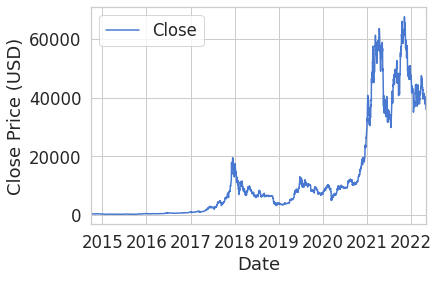

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

# Parte 2, Normalizacion de datos

A continuacion, vamos a escalar los datos dentro del rango [0,1], utilizaremos la funcion MinMaxScaler, la cual  Transforma las funciones escalando cada función a un rango determinado.

Este estimador escala y traduce cada característica individualmente de modo que esté en el rango dado en el conjunto de entrenamiento, p. entre cero y uno.

La transformación está dada por:

X_std = (X - X.min(eje=0)) / (X.max(eje=0) - X.min(eje=0))


X_scaled = X_std * (máx. - mín.) + mín.


donde min, max = rango_de_características.

Esta transformación se utiliza a menudo como una alternativa al escalado de varianza unitaria de media cero.



El escalador espera que los datos tengan la forma de (x, y), por lo que agregamos una dimensión ficticia usando reshape antes de aplicarla.


In [ ]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)
print(close_price)

[[  383.61499 ]
 [  375.071991]
 [  359.511993]
 ...
 [39698.371094]
 [36575.140625]
 [35982.382813]]


In [ ]:
scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(2775, 1)

In [ ]:
np.isnan(scaled_close).any()

False

Usamos isnan como máscara para filtrar los valores de NaN. Nuevamente remodelamos los datos después de eliminar los NaN.

In [ ]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [ ]:
scaled_close = scaled_close.reshape(-1, 1)

In [ ]:
np.isnan(scaled_close).any()

False

In [ ]:
scaled_close  #Escalado del precio de cierre

array([[0.00304965],
       [0.00292288],
       [0.00269198],
       ...,
       [0.58645223],
       [0.54010575],
       [0.53130965]])

# Part 3, Preprocesamiento

Para la realizacion del modelo de red neuronal, se necesita que los datos estén en 3 dimensiones,LSTM requiere una entrada como tensor 3D.


Necesitamos dividir los datos en secuencias de una longitud preestablecida. La forma que queremos obtener es:
[batch_size, sequence_length, n_features]

También queremos guardar algunos datos para realizar pruebas.

![lstm](https://miro.medium.com/max/1240/1*YnGyWhlkVc88XYOvvQ1QbA.png)
### Batch Size
El Batch Size es cuántas observaciones analizará el modelo al mismo tiempo.
Dado que el tamaño del lote generalmente se proporciona en el momento del entrenamiento y es una variable.

### sequence_length

Longitud de secuencia es la longitud de la secuencia de datos de entrada (paso de tiempo: 0,1,2…N), la RNN aprende el patrón secuencial en el conjunto de datos.

Suponga que tiene datos del mercado de acciones a diario (frecuencia = 1 día) y desea que la red aprenda la secuencia de 30 días de datos. Entonces, la longitud de su secuencia será 30.


El proceso de construcción de secuencias funciona creando una secuencia de una longitud específica en la posición 0. Luego cambiamos una posición a la derecha (por ejemplo, 1) y creamos otra secuencia. El proceso se repite hasta que se utilizan todas las posiciones posibles.

### N_ Features
n_features determina cuántas columnas o características tendrán los conjuntos de datos generados. En el aprendizaje automático, las características corresponden a datos de características numéricas



In [ ]:
SEQ_LEN = 100 ## Diaz de cambios en el precio de bitcoin

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0]) # 5% del total de datos

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :] # 5% del escalado del precio de cierre
    y_test = data[num_train:, -1, :] 

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)
# SEQ_LEN = 100
# train_split = 0.95 ///// # 5% del total de datos
# scaled_close  #Escalado del precio de cierre

## x_Train
El conjunto de entrenamiento debe ser una selección aleatoria del 95% de los datos originales.
## X_Test
El conjunto de prueba debe ser el 5% restante.

In [ ]:
X_train.shape

(2541, 99, 1)

In [ ]:
X_test.shape

(134, 99, 1)

In [ ]:
X_test

array([[[0.71225928],
        [0.70642762],
        [0.69877292],
        ...,
        [0.69302653],
        [0.72354107],
        [0.71896907]],

       [[0.70642762],
        [0.69877292],
        [0.71377312],
        ...,
        [0.72354107],
        [0.71896907],
        [0.75096295]],

       [[0.69877292],
        [0.71377312],
        [0.69866459],
        ...,
        [0.71896907],
        [0.75096295],
        [0.75152175]],

       ...,

       [[0.54128083],
        [0.5457278 ],
        [0.54421594],
        ...,
        [0.55701858],
        [0.56821064],
        [0.56910448]],

       [[0.5457278 ],
        [0.54421594],
        [0.54846165],
        ...,
        [0.56821064],
        [0.56910448],
        [0.55754653]],

       [[0.54421594],
        [0.54846165],
        [0.55804927],
        ...,
        [0.56910448],
        [0.55754653],
        [0.58645223]]])


Guardamos el 5% de los datos para las pruebas. Los conjuntos de datos se ven así:

### X_train
(2541, 99, 1)

### X_test
(134, 99, 1)


Nuestro modelo utilizará 2541 precios que representan 99 días de cambios en el precio de Bitcoin cada una para el entrenamiento. Vamos a predecir el precio para 134 días en el futuro.

# Parte 4, Modelado
Para el Modelado de datos utilizaremos la libreria LSTM de keras.

Según Palash Sharma(Febrero 1, 2021)
Long Short-Term Memory Network o LSTM, es una variación de una red neuronal recurrente (RNN) que es bastante efectiva para predecir secuencias largas de datos como oraciones y precios de acciones durante un período de tiempo.

LSTM con sus celdas de memoria es una versión mejorada de los RNN tradicionales que no pueden predecir utilizando una secuencia de datos tan larga y se encuentran con el problema del gradiente de fuga.


![LST](https://machinelearningknowledge.ai/ezoimgfmt/953894.smushcdn.com/2611031/wp-content/uploads/2021/01/LSTM-282x300.png?lossy=0&strip=1&webp=1&ezimgfmt=ng:webp/ngcb1)


Sharma, P. (2021, February). Machinelearningknowledge.ai. https://machinelearningknowledge.ai/keras-lstm-layer-explained-for-beginners-with-example/#:~:text=Long%20Short%2DTerm%20Memory%20Network,feedback%20loop%20in%20its%20architecture.



.





##Construcción del modelo LSTM
Estamos creando una red neuronal recurrente LSTM de 3 capas.

#### Definicion Sobreajuste:
es decir, cuando el modelo se adapta demasiado bien a los datos disponibles, pero no demasiado bien a los datos que no ha visto (y eso es importante para las decisiones comerciales).
‌

# Dropout
El Dropout consiste en establecer aleatoriamente una tasa de fracción de unidades de entrada en 0 en cada actualización durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste.

El término "DROPOUT" se utiliza para una técnica que elimina algunos nodos de la red. La DROPPING OUT puede verse como una desactivación o un desconocimiento temporal de las neuronas de la red. Esta técnica se aplica en la fase de entrenamiento para reducir los efectos de sobreajuste. El sobreajuste es un error que ocurre cuando una red se ajusta demasiado a un conjunto limitado de muestras de entrada.

Flotante entre 0 y 1. Fracción de las unidades de entrada a eliminar.

 Usamos Dropout con una tasa del 20% para combatir el sobreajuste durante el entrenamiento:

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

# Parte 5, entrenamiento
Usaremos el Mean Squared Error como función de pérdida y el optimizador de Adam.

El error cuadrático medio (MSE) te dice qué tan cerca está una línea de regresión de un conjunto de puntos. Lo hace tomando las distancias desde los puntos hasta la línea de regresión (estas distancias son los "errores") y elevándolas al cuadrado. La cuadratura es necesaria para eliminar cualquier signo negativo. También da más peso a las diferencias más grandes. Se llama el error cuadrático medio ya que estás encontrando el promedio de un conjunto de errores. Cuanto menor sea el MSE, mejor será el pronóstico.
![MSE](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

Un epoch significa que el modelo analizará todos los datos una vez.
El Batch Size es cuántas observaciones analizará el modelo al mismo tiempo.


Estos valores deben ajustarse juntos y también de acuerdo con el hardware porque cuantas más epoch o menor batch size, más tiempo tardará el modelo en ser entrenado; además, un número muy elevado de epochs podría provocar un sobreajuste. Para este ejemplo, voy a usar 50 epoch y un tamaño de lote de 64 Toda la información se guardará en un objeto llamado "History".

In [ ]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
36/36 [==============================] - 78s 2s/step - loss: 0.0048 - val_loss: 0.1943
Epoch 2/50
36/36 [==============================] - 60s 2s/step - loss: 0.0087 - val_loss: 0.2973
Epoch 3/50
36/36 [==============================] - 61s 2s/step - loss: 0.0190 - val_loss: 0.0234
Epoch 4/50
36/36 [==============================] - 61s 2s/step - loss: 0.0084 - val_loss: 0.3163
Epoch 5/50
36/36 [==============================] - 60s 2s/step - loss: 0.0753 - val_loss: 0.1835
Epoch 6/50
36/36 [==============================] - 60s 2s/step - loss: 0.0046 - val_loss: 0.0449
Epoch 7/50
36/36 [==============================] - 59s 2s/step - loss: 0.0140 - val_loss: 0.0338
Epoch 8/50
36/36 [==============================] - 60s 2s/step - loss: 0.0051 - val_loss: 0.0226
Epoch 9/50
36/36 [==============================] - 59s 2s/step - loss: 0.0012 - val_loss: 0.0355
Epoch 10/50
36/36 [==============================] - 59s 2s/step - loss: 0.0055 - val_loss: 0.0496
Epoch 11/50
36/36 [

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 246ms/step - loss: 0.0011


0.0011107254540547729

Después de un entrenamiento, tenemos la siguiente pérdida de entrenamiento:

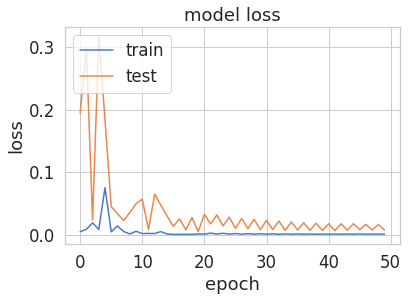

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Parte 6, Prediccion
Realizaremos la predicción del precio de Bitcoin, Utilizaremos escalador para invertir la transformación que hicimos para que los precios ya no estén escalados en el rango [0, 1].

La función predict () acepta solo un único argumento, que generalmente son los datos que se probarán.

Devuelve las etiquetas de los datos pasados como argumento en función de los datos aprendidos o entrenados obtenidos del modelo.

Por lo tanto, la función predict() funciona sobre el modelo entrenado y utiliza la etiqueta aprendida para mapear y predecir las etiquetas de los datos que se probarán.

Cómo recordamos, se guardo el 5% de los datos para las pruebas (X_test, Y_test). Los conjuntos de datos se ven así:

Total (2541, 99, 1)


Prueba (134, 99, 1)

Nuestro modelo utilizará 2541 secuencias que representan 99 días de cambios en el precio de Bitcoin cada una para el entrenamiento. Vamos a predecir el precio para 134 días en el futuro.

El 1 es una dimensión ficticia

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

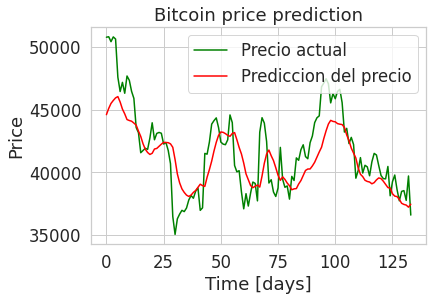

In [ ]:
plt.plot(y_test_inverse, label="Precio actual", color='green')
plt.plot(y_hat_inverse, label="Prediccion del precio", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# Conclusion
Con la red neuronal recurrente LSTM bidireccional en TensorFlow 2, se puede observar una correcta prediccion al precio de bitcoin con respecto al precio actual del bitcoin, el modelo es bastante general y se puede usar para otros conjuntos de datos o moneda.

.

.

# Prediccion de precio del bitcoin utilizando Regresion lineal
La regresión lineal permite predecir el comportamiento de una variable (dependiente o predicha) a partir de otra (independiente o predictora). Tiene presunciones como la linearidad de la relación, la normalidad, la aleatoridad de la muestra y homogeneidad de las varianzas.

# Preprocesamiento
Convertiremos los ID en un vector utilizando reshape para poder inicializar el modelo con estos valores

In [ ]:
dates = df.index
prices = df.Close.values.reshape(-1, 1)
prices

array([[  383.61499 ],
       [  375.071991],
       [  359.511993],
       ...,
       [39698.371094],
       [36575.140625],
       [35982.382813]])

In [ ]:
dates = np.reshape(dates, (len(dates),1))
prices = np.reshape(prices, (len(prices),1))
dates

array([[   0],
       [   1],
       [   2],
       ...,
       [2772],
       [2773],
       [2774]])

In [ ]:
prices

array([[  383.61499 ],
       [  375.071991],
       [  359.511993],
       ...,
       [39698.371094],
       [36575.140625],
       [35982.382813]])

In [ ]:
regressor = LinearRegression()
regressor.fit(dates, prices)
predicted = regressor.predict(dates)
score = regressor.score(dates, prices)

#   Visualizacion

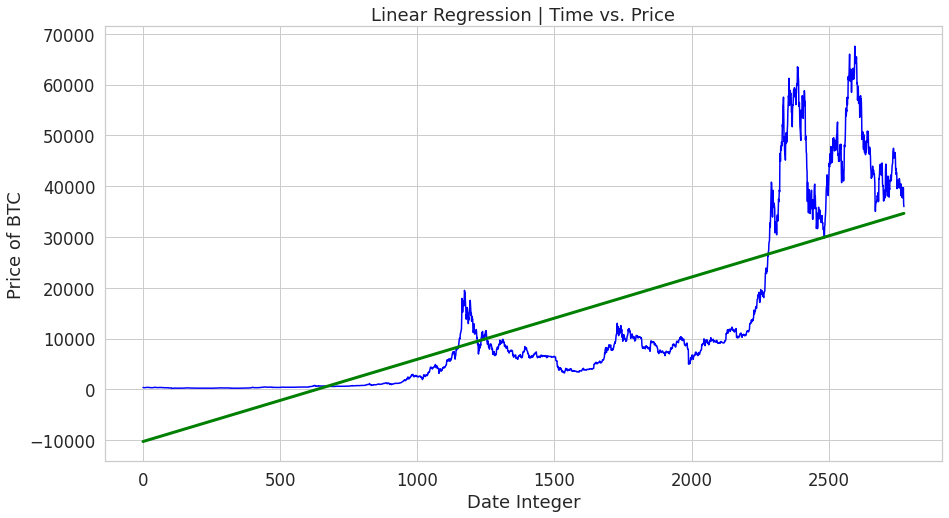

Puntuación de precisión para la regresión lineal estándar 0.608285762117528


In [ ]:
plt.figure(figsize=(15,8)) 
plt.plot(dates, prices, color='blue', label='Acutal Price')
plt.plot(dates, predicted, color='green', linewidth=3, label='Predicted Price')
plt.title('Linear Regression | Time vs. Price')

plt.xlabel('Date Integer')
plt.ylabel('Price of BTC')
plt.show()

print('Puntuación de precisión para la regresión lineal estándar', score)

#Entrenamiento

Tenemos que pasar nuestras variables a 2 dimensiones

In [ ]:
xtrain=X_train.reshape(-1,1)
ytrain=y_train.reshape(-1,1)
xtest=X_test.reshape(-1,1)
ytest=y_test.reshape(-1,1)
ytest.shape

(134, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

Nuestro modelo ya ha sido entrenado.

# **Gráfico** de conjunto de prueba

Utilizaremos los mismos predictores de RNN 

Cómo recordamos, se guardo el 5% de los datos para las pruebas (X_test, Y_test). Los conjuntos de datos se ven así:

Total (2541, 99, 1)


Prueba (134, 99, 1)

Nuestro modelo utilizará 2541 secuencias que representan 99 días de cambios en el precio de Bitcoin cada una para el entrenamiento. Vamos a predecir el precio para 134 días en el futuro.

El 1 es una dimensión ficticia

In [ ]:
y_hat = model.predict(xtest)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

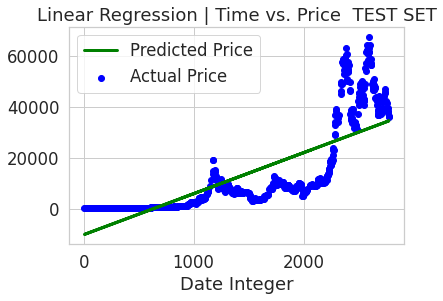

Accuracy score for test set 0.6074854172204167


In [ ]:
plt.scatter(xtest, ytest, color='blue', label= 'Actual Price') #Con las variables de test
plt.plot(xtest, regressor.predict(xtest), color='green', linewidth=3, label = 'Predicted Price') #Mismo predictor XTEST
plt.title('Linear Regression | Time vs. Price  TEST SET')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
print('Accuracy score for test set', regressor.score(xtest, ytest))

# Predicción para un año a partir de ahora
Crearemos una variable llamada prediccion, utilizaremos la funcion predict para añadirle un año a la prediccion y veremos cuano será el precio del bitcoin.

In [ ]:
prediccion = regressor.predict([[1863+365]])
print('Según el modelo de regresión lineal, el precio de BTC será', int(prediccion[0][0]), "en un año.")

Según el modelo de regresión lineal, el precio de BTC será 25739 en un año.


# Conclusiones
Tuvimos éxito en gran medida en la predicción de los precios de Bitcoin. Pero, en general, esto no funcionará bien en el mundo real, el modelo de regresion linea obtuvo una buena Puntuación de precisión para el conjunto de prueba lo cual nos permitio desarrollar una prediccion del precio dentro de un año

In [ ]:
test=regressor.predict(xtest)
def MSE(y, t):
    return 0.5 * np.sum((y - t)**2)

mse(ytest, test)

array([[-10127.65793212],
       [-10127.75184251],
       [-10127.8751101 ],
       ...,
       [-10129.9632307 ],
       [-10130.14935445],
       [-10129.68387052]])

# Regresion de vector
Support Vector Regression es un algoritmo de aprendizaje supervisado que se utiliza para predecir valores discretos. Support Vector Regression utiliza el mismo principio que las SVM. La idea básica detrás de SVR es encontrar la mejor línea de ajuste.

SVR requiere los datos de entrenamiento: {X, Y} que cubre el dominio de interés y está acompañado por soluciones en ese dominio

In [ ]:
from sklearn.svm import SVR
svr_lin = SVR(kernel = 'linear', C=1e3)

Utilizamos el método de ajuste de scikit-learn para entrenar nuestro modelo en nuestros datos de entrenamiento.

In [ ]:
svr_lin.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, kernel='linear')

## Graficamos los resultados


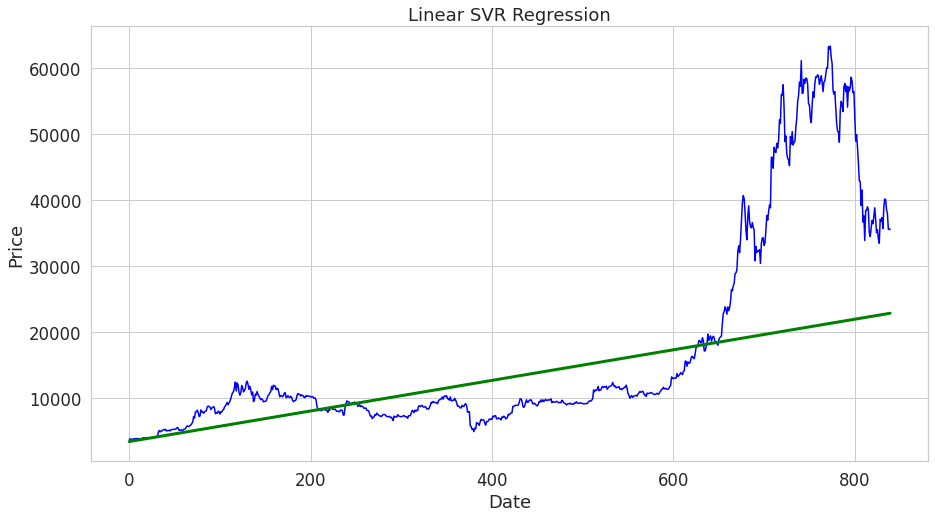

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(dates, prices, color='blue', label='Acutal Price')
plt.plot(dates, svr_lin.predict(xtest), color='green', linewidth=3, label='Linear SVR') ##Mismo predictor
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear SVR Regression')
plt.show()

Realizaremos la prediccion de un año a partir de ahora para comparar con la regresion lineal

In [ ]:
score = svr_lin.score(dates, prices)
year_from_now = svr_lin.predict([[1863+365]])
print("Puntuación de precisión para el modelo SVR lineal", score)
print('De acuerdo con el modelo de regresión de vector de soporte lineal, el precio de BTC será', int(year_from_now), "en un año")

Puntuación de precisión para el modelo SVR lineal 0.346484273159001
De acuerdo con el modelo de regresión de vector de soporte lineal, el precio de BTC será 55060 en un año


# Conclusion
El modelo de regresion de vector muestra una diferencia respecto al modelo de regresion lineal, siendo el lineal alcista y el vectorial bajista, de igual forma, el modelo vectorial tiene una puntuacion de presicion baja.

Para el mundo real, utilizariamos el modelo de red neuronal LSTM de Keras de Tensorflow, ya que, tiene más similitud con la prediccion y los datos actuales, para observar al futuro los precios.

# Error cuadratico medio para validar todos los datos
